# Cell 1: Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline
sns.set(style="whitegrid")

# Cell 2: Load the Dataset

In [2]:
data = load_breast_cancer()
X = data.data             # Features
y = data.target           # Target (0: malignant, 1: benign)
features = data.feature_names
target_names = data.target_names

# Create a DataFrame for easy inspection
df = pd.DataFrame(X, columns=features)
df['target'] = y

# Display the first few rows of the DataFrame
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Cell 3: Check for Missing Values

In [3]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


>Note: The dataset typically has no missing values.

# Cell 4: Split into Training (70%) and Testing (30%) Sets with Stratified Sampling

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (398, 30)
Testing set shape: (171, 30)


# Cell 5: Standardize the Features Using StandardScaler

In [5]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Cell 6: Apply PCA to Reduce Features to 2 Components

In [6]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.45156229 0.19628669]


# Cell 7: Visualize the PCA Results by Plotting the First Two Principal Components


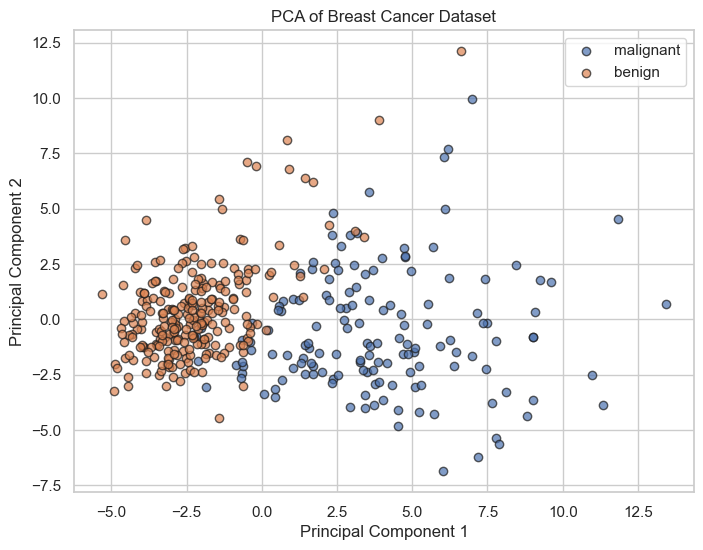

[[ 0.56510397  3.36910479]
 [-4.87629387 -2.01855452]
 [-3.97265066  0.83809251]
 [-2.38416576 -0.19286806]
 [-3.1320303   0.48344529]
 [-4.20485222  2.32772659]
 [-1.9653006   1.65018644]
 [ 3.50697071 -2.39185898]
 [-0.17381663 -0.23471841]
 [-4.00879686 -0.4492872 ]
 [ 7.65595754 -3.79368768]
 [ 4.01676422  0.41353775]
 [ 4.55639471 -0.84490832]
 [-4.4502456  -3.02904507]
 [-2.0836898   0.02614057]
 [ 0.69596222  0.82756255]
 [ 2.78986728  0.50785593]
 [-2.946283   -2.62280586]
 [-1.99136374 -0.21456251]
 [-4.56522309 -0.06147406]
 [-0.66875612 -2.41213628]
 [-2.40618274  0.66181118]
 [-1.41895203  1.56359003]
 [-4.80456148 -2.20630369]
 [-1.09925559 -0.40529016]
 [ 2.331986    3.83068599]
 [-4.13847692 -0.44055498]
 [-3.85336463 -1.90611107]
 [-3.52934401  1.74042886]
 [-2.92934172 -1.39945978]
 [-1.2109029  -0.11170605]
 [-0.47243712  2.25858505]
 [ 1.43443816 -2.46620003]
 [ 7.40985078  1.82507411]
 [-1.98862608  1.4060174 ]
 [-3.1394729  -2.00725471]
 [-2.24072158  2.80496637]
 

In [ ]:
plt.figure(figsize=(8, 6))
# Plot data points for each class
plt.scatter(X_train_pca[y_train == 0, 0], X_train_pca[y_train == 0, 1],
            label=target_names[0], alpha=0.7, edgecolors='k')
plt.scatter(X_train_pca[y_train == 1, 0], X_train_pca[y_train == 1, 1],
            label=target_names[1], alpha=0.7, edgecolors='k')

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Breast Cancer Dataset")
plt.legend()
plt.show()

print(X_train_pca)
print(y_train == 0)
print(X_train_pca[:,1])